In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:/Users/LAKSHYA/Documents/ML/datasets/fake news/train.csv')
test = pd.read_csv('C:/Users/LAKSHYA/Documents/ML/datasets/fake news/test.csv')
submit=pd.read_csv('C:/Users/LAKSHYA/Documents/ML/datasets/fake news/submit.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
#drop row with none value
# train.dropna(thresh = train.shape[1] , inplace = True)

In [6]:
train = train.fillna('')

In [7]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [9]:
test = test.fillna('')

In [10]:
train.shape

(20800, 5)

In [11]:
train.author.nunique()

4202

In [12]:
train.author.value_counts()[:3]

           1957
Pam Key     243
admin       193
Name: author, dtype: int64

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAKSHYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import string
import re
from nltk.corpus import stopwords
stop_word = stopwords.words('english')
def cleaning_data(x):
    #lower the value
    x =x.lower()
    #converting in ascii value
    x = x.encode('ascii' , 'ignore').decode()
    #removing all the stopword
    x = ' '.join([word for word in x.split(' ') if word not in stop_word])
    #remove mentions
    x = re.sub('@\S+' , ' ' , x)
    #remove url
    x = re.sub('https*\S+' , ' ' , x)
    #remove hastag
    x= re.sub('#\S+' , ' ' , x)
    #remove ticks and next character
    x = re.sub("\'\w+" , ' ' , x)
    #remove punctuations
    x = re.sub('[%s]' % re.escape(string.punctuation) , ' ' , x)
    #remove number
    x = re.sub(r'\w+\d+\w*' ,'  ' , x)
    #remove the over spaces
    x = re.sub('\s{2,}' , '' , x)
    return x
    

In [15]:
train.title = train.title.apply(cleaning_data)
train.author = train.author.apply(cleaning_data)
train.text =  train.text.apply(cleaning_data)

In [16]:
train.head()

,id,title,author,text,label
0,0,house dem aidedidnt even see comeys letter jas...,darrell lucus,house dem aidedidnt even see comeys letter jas...,1
1,1,flynnhillary clintonbig woman campusbreitbart,daniel jflynn,ever get feeling life circles roundabout rathe...,0
2,2,truth might get fired,consortiumnews com,truth might get fired octoberthe tension intel...,1
3,3,civilians killed single us airstrike identified,jessica purkiss,videoscivilians killed single us airstrike ide...,1
4,4,iranian woman jailed fictional unpublished sto...,howard portnoy,printan iranian woman sentenced six years pris...,1


In [17]:
from nltk.stem.porter import PorterStemmer
port = PorterStemmer()
def lemetazation(x):
    x = ' '.join([port.stem(word) for word in x.split(' ')])
    return x

    

In [18]:
train.text =  train.text.apply(lemetazation)
train.title =  train.title.apply(lemetazation)

In [19]:
train.head()

,id,title,author,text,label
0,0,hous dem aidedidnt even see comey letter jason...,darrell lucus,hous dem aidedidnt even see comey letter jason...,1
1,1,flynnhillari clintonbig woman campusbreitbart,daniel jflynn,ever get feel life circl roundabout rather hea...,0
2,2,truth might get fire,consortiumnews com,truth might get fire octoberth tension intelli...,1
3,3,civilian kill singl us airstrik identifi,jessica purkiss,videoscivilian kill singl us airstrik identifi...,1
4,4,iranian woman jail fiction unpublish stori wom...,howard portnoy,printan iranian woman sentenc six year prison ...,1


In [20]:
train['content'] = train.title + ' '+train.author

In [21]:
train.drop(['title' , 'author'] , axis = 1 , inplace = True)

In [22]:
train.head()

,id,text,label,content
0,0,hous dem aidedidnt even see comey letter jason...,1,hous dem aidedidnt even see comey letter jason...
1,1,ever get feel life circl roundabout rather hea...,0,flynnhillari clintonbig woman campusbreitbart ...
2,2,truth might get fire octoberth tension intelli...,1,truth might get fire consortiumnews com
3,3,videoscivilian kill singl us airstrik identifi...,1,civilian kill singl us airstrik identifi jessi...
4,4,printan iranian woman sentenc six year prison ...,1,iranian woman jail fiction unpublish stori wom...


In [23]:
test.title = test.title.apply(cleaning_data)
test.author = test.author.apply(cleaning_data)
test.text =  test.text.apply(cleaning_data)

In [24]:
test.head()

,id,title,author,text
0,20800,specter trump loosens tonguespurse stringssili...,david streitfeld,palo altocalifyears scorning political process...
1,20801,russian warships ready strike terrorists near ...,,russian warships ready strike terrorists near ...
2,20802,native american leaders vow stay winterfile la...,common dreams,videosnative american leaders vow stay winterf...
3,20803,tim tebow attempt another comebacktime basebal...,daniel victor,first dont succeedtry different sporttim tebow...
4,20804,keiser reportmeme wars,truth broadcast network,mins ago 1 views 0 comments 0 likesfirst time ...


In [25]:
test.text =  test.text.apply(lemetazation)
test.title =  test.title.apply(lemetazation)

In [26]:
test['content'] = test.title + ' ' + test.author

In [27]:
test.head()

,id,title,author,text,content
0,20800,specter trump loosen tonguespurs stringssilico...,david streitfeld,palo altocalifyear scorn polit processsilicon ...,specter trump loosen tonguespurs stringssilico...
1,20801,russian warship readi strike terrorist near al...,,russian warship readi strike terrorist near al...,russian warship readi strike terrorist near al...
2,20802,nativ american leader vow stay winterfil lawsu...,common dreams,videosn american leader vow stay winterfil law...,nativ american leader vow stay winterfil lawsu...
3,20803,tim tebow attempt anoth comebacktim baseballne...,daniel victor,first dont succeedtri differ sporttim tebowhei...,tim tebow attempt anoth comebacktim baseballne...
4,20804,keiser reportmem war,truth broadcast network,min ago 1 view 0 comment 0 likesfirst time his...,keiser reportmem war truth broadcast network


In [28]:
test.drop(['title' , 'author'] , axis =1 ,inplace = True)

In [29]:
y = train.label
train.drop(['label'] , axis =1 , inplace =True)

In [30]:
X = train.content.values
y = y.values

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [32]:
print(X)

  (0, 32269)	0.2868947773934823
  (0, 27343)	0.24515190364021097
  (0, 18003)	0.3355809588504751
  (0, 17314)	0.2753391577424527
  (0, 15635)	0.2301919364890898
  (0, 14279)	0.21152069786719252
  (0, 10213)	0.22128236920546668
  (0, 7975)	0.2617962926086126
  (0, 7468)	0.3355809588504751
  (0, 6067)	0.24108556715564933
  (0, 4994)	0.3480875411786823
  (0, 794)	0.40253125737436973
  (1, 34584)	0.3038187130866618
  (1, 15771)	0.3936154569924042
  (1, 11464)	0.5010198596446068
  (1, 7422)	0.26070081628205855
  (1, 5663)	0.5010198596446068
  (1, 4480)	0.42749777364132613
  (2, 32133)	0.4090498675348207
  (2, 19231)	0.47715892929715603
  (2, 12326)	0.3445647151258122
  (2, 11191)	0.3874956433949953
  (2, 6418)	0.4416970964666712
  (2, 6041)	0.37553098470674273
  (3, 32784)	0.2292940953026029
  :	:
  (20797, 31060)	0.0785254707910341
  (20797, 30357)	0.31161263833516045
  (20797, 26622)	0.2441050394678839
  (20797, 24758)	0.26855315262942114
  (20797, 24357)	0.2389440270119339
  (20797, 1918

In [33]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X , y , stratify = y)

In [34]:
test_ = test.content.values

In [35]:
test_ = vectorizer.transform(test_)

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred = model.predict(X_test)


In [66]:
from sklearn.metrics import accuracy_score


In [68]:
model_scores={}
model_scores["Logistic Regression"]=accuracy_score(y_test,y_pred)
model_scores["Logistic Regression"]

0.9746153846153847

In [69]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=100)


In [70]:
model1.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
y_pred2=model1.predict(X_test)
model_scores["Random forest classifier"]=accuracy_score(y_test,y_pred2)
model_scores["Random forest classifier"]

0.9903846153846154

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
y_pred3=knn_model.predict(X_test)
model_scores["K-neighbors classifier"]=accuracy_score(y_test,y_pred3)
model_scores["K-neighbors classifier"]

0.5307692307692308

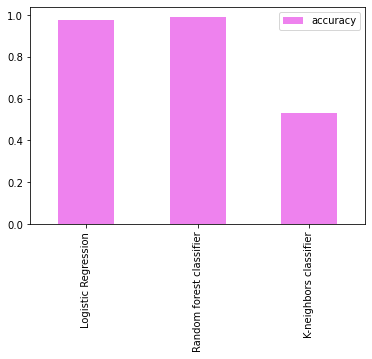

In [80]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color="violet");